# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Image Preprocessing Layer, Image Augmentation Layer를 통해 이미지를 변형시켜 봅시다.
            * Transfer Learning(Inception V3)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : Google Colaboratory의 가상 컴퓨터 안에 데이터셋을 다운로드 받고 압축을 해제하세요.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (1) 라이브러리 불러오기

In [4]:
import gdown, zipfile
import os, glob, shutil
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

### (2) 데이터 불러오기

#### 1) 데이터 다운로드

In [ ]:
# def download_file(file_id, save_path) :
#     if os.path.exists(save_path) :
#         print(f'{save_path} 파일이 이미 존재합니다.')
#         return

#     gdown.download(id=file_id, output=save_path, quiet=False)

In [ ]:
# file_id = '1JHo4Rsb8Mx-sJqu7xdQWUgrfAf3H1g7W'

# download_file(file_id, 'car_images.zip')

#### 2) 데이터 압축 해제

In [ ]:
def dataset_extract(file_name) :
    with zipfile.ZipFile(file_name, 'r') as zip_ref :
        file_list = zip_ref.namelist() # zip_ref에 포함된 모든 파일과 폴더의 이름 목록을 file_list에 저장

        if os.path.exists(f'{file_name[:-4]}/') :
            print(f'데이터셋 폴더가 이미 존재합니다.')
            return

        else :
            for f in tqdm(file_list, desc='Extracting', unit='files') : # 파일 목록 반복하면서 파일 추출. tqdm은 진행률 표시줄로, 각 파일이 추출될 때마다 Extracting과 함께 파일 수 표시
                zip_ref.extract(member=f, path=f'{file_name[:-4]}/')

In [ ]:
dataset_extract('/content/drive/MyDrive/KT Aivle/Mini Project 4/Car_Images.zip')

Extracting: 100%|██████████| 607/607 [00:21<00:00, 27.62files/s]


#### 2) 데이터 조회

In [5]:
# 데이터셋 경로 설정
dataset_path = '/content/drive/MyDrive/KT Aivle/Mini Project 4/Car_Images'
normal_path = dataset_path + '/normal'
abnormal_path = dataset_path + '/abnormal'

In [6]:
# 폴더별 이미지 데이터 갯수 확인
n = len(os.listdir(normal_path))
a = len(os.listdir(abnormal_path))
print(f'정상 {n}장 | 파손 {a}장')

정상 302장 | 파손 303장


In [7]:
import random as rd

In [8]:
os.listdir(normal_path)[:5]

['DALLíñE 2023-03-10 18.50.11 - photo of a part of car.png',
 'DALLíñE 2023-03-10 18.50.18 - photo of a part of car.png',
 'DALLíñE 2023-03-10 18.50.25 - photo of a part of car.png',
 'DALLíñE 2023-03-10 18.50.29 - photo of a part of car.png',
 'DALLíñE 2023-03-10 18.52.13 - photo of a part of car.png']

In [9]:
from PIL import Image

id = 168


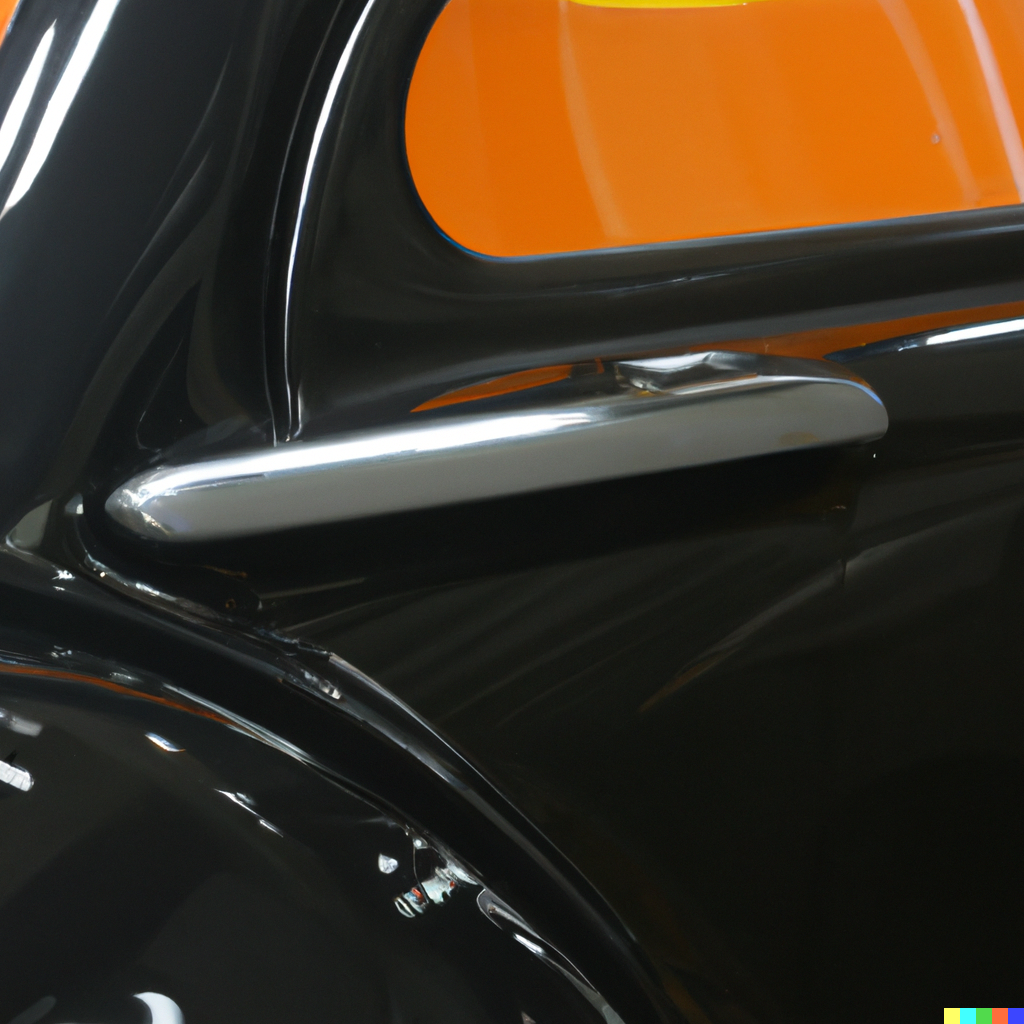

In [ ]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인
id = rd.randrange(0,n)

print(f'id = {id}')

file_path = os.path.join(normal_path, os.listdir(normal_path)[id])
Image.open(file_path)

id = 108


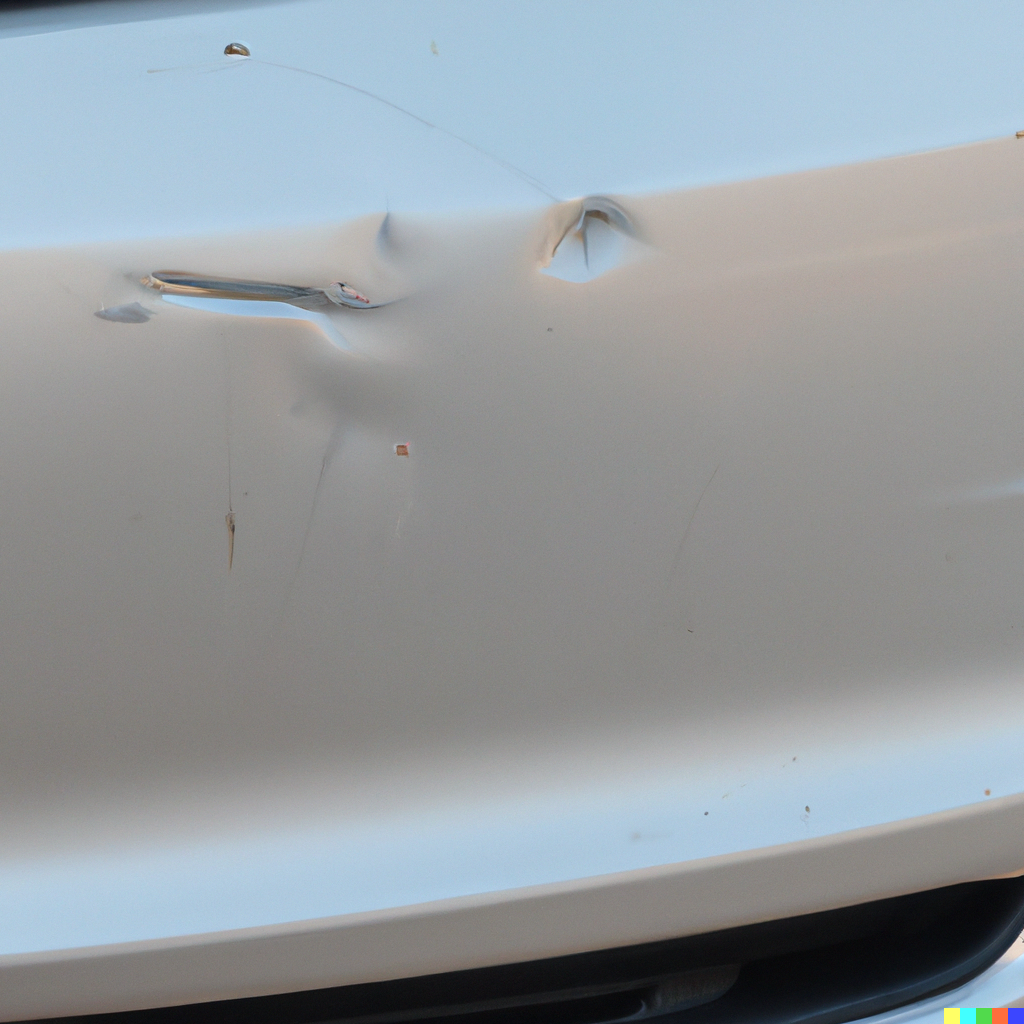

In [ ]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인
id = rd.randrange(0,a)

print(f'id = {id}')

file_path = os.path.join(abnormal_path, os.listdir(abnormal_path)[id])
Image.open(file_path)

- abnormal image 이름 변경

In [ ]:
# for f in os.listdir(abnormal_path):
#     new_name = 'ab_' + f
#     os.rename(os.path.join(abnormal_path, f), os.path.join(abnormal_path, new_name))

## 2.데이터 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

### (1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [10]:
y = np.zeros(n+a, dtype=int)
y[:n] = 0
y[n:n+a] = 1

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### (2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [12]:
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from glob import glob

# 이미지 데이터와 레이블을 저장할 리스트 초기화
images = []
labels = []

# 'normal' 이미지 로드 및 처리
normal_image_dir = normal_path
normal_image_paths = glob(os.path.join(normal_image_dir, '*'))
for img_path in normal_image_paths:
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    images.append(img_array)
    labels.append(0)

# 'abnormal' 이미지 로드 및 처리
abnormal_image_dir = abnormal_path
abnormal_image_paths = glob(os.path.join(abnormal_image_dir, '*'))
for img_path in abnormal_image_paths:
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img)
    images.append(img_array)
    labels.append(1)

# 리스트를 NumPy 배열로 변환 및 정규화
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels)

# 최종 데이터셋 형태 확인
print(f'최종 이미지 데이터 형태: {images.shape}')
print(f'최종 레이블 형태: {labels.shape}')


최종 이미지 데이터 형태: (605, 150, 150, 3)
최종 레이블 형태: (605,)


### (3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율 (1) : train set, test set = 90%, 10%으로 설정하세요.
    - 데이터 스플릿의 비율 (2) : train set, valid set = 90%, 10%으로 설정하세요.

In [13]:
from sklearn.model_selection import train_test_split

# 먼저 전체 데이터를 훈련 세트와 테스트 세트로 분할 (90% 훈련, 10% 테스트)
X_train_test, X_test, y_train_test, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

# 훈련 데이터를 다시 훈련 세트와 검증 세트로 분할 (90% 훈련, 10% 검증)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_test, y_train_test, test_size=0.1, random_state=42)

# 분할된 데이터셋의 크기 확인
print(f"훈련 세트 이미지 크기: {X_train.shape}, 레이블 크기: {y_train.shape}")
print(f"검증 세트 이미지 크기: {X_valid.shape}, 레이블 크기: {y_valid.shape}")
print(f"테스트 세트 이미지 크기: {X_test.shape}, 레이블 크기: {y_test.shape}")

훈련 세트 이미지 크기: (489, 150, 150, 3), 레이블 크기: (489,)
검증 세트 이미지 크기: (55, 150, 150, 3), 레이블 크기: (55,)
테스트 세트 이미지 크기: (61, 150, 150, 3), 레이블 크기: (61,)


### (4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.

## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [15]:
from keras.backend import clear_session
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [16]:
clear_session()

# 인풋레이어
il = Input(shape=(150, 150, 3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(il)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size = (2, 2),
               strides = (2, 2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# Convolution : 필터수 64, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size = (2, 2),
               strides = (2, 2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 10
hl = Dense(10, activation = 'relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(1, activation = 'sigmoid')(hl)

model = Model(il, ol)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 87616)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         876,170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 942,173 (3.59 MB)

 Trainable params: 941,961 (3.59 MB)

 Non-trainable params: 212 (848.00 B)

In [27]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping

In [29]:
es = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    verbose = 1,
    patience= 10,
    restore_best_weights=True
)

In [30]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=.2, verbose=1, callbacks=[es], batch_size=32).history

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 592ms/step - accuracy: 0.9516 - loss: 0.1827 - val_accuracy: 0.5000 - val_loss: 0.7100
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9760 - loss: 0.1417 - val_accuracy: 0.6224 - val_loss: 0.6860
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9643 - loss: 0.1566 - val_accuracy: 0.4694 - val_loss: 1.0279
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9804 - loss: 0.1323 - val_accuracy: 0.4694 - val_loss: 1.1394
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9899 - loss: 0.1126 - val_accuracy: 0.4694 - val_loss: 1.0824
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9812 - loss: 0.1297 - val_accuracy: 0.4694 - val_loss: 1.1107
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9968 - loss: 0.0934 - val_accuracy: 0.4694 - val_loss: 1.1443
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9919 - loss: 0.0996 - val_ac

In [31]:
performance_test = model.evaluate(X_train, y_train)

print( f'Test Loss : {performance_test[0]:.6f}, Test Accuracy : {performance_test[1]*100:.3f}%' )

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6206 - loss: 0.6705
Test Loss : 0.670581, Test Accuracy : 62.372%


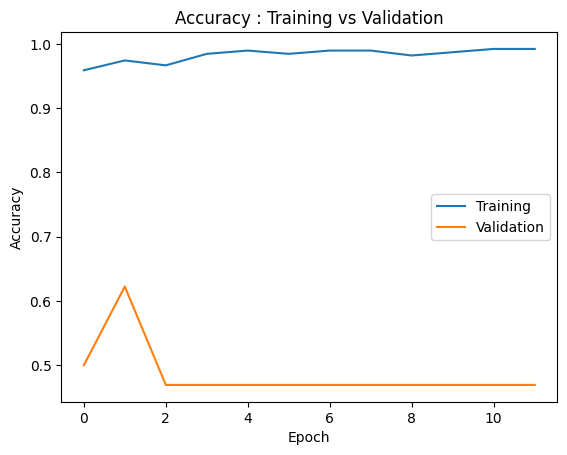

In [32]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

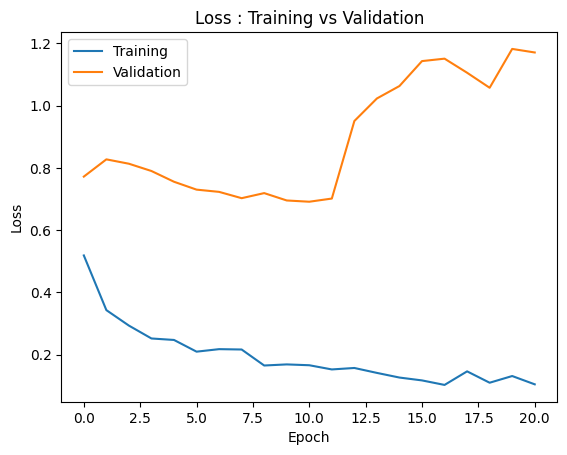

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

logi_train_accuracy = accuracy_score(X_train, pred_train)
logi_test_accuracy = accuracy_score(X_test, pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


ValueError: Classification metrics can't handle a mix of unknown and continuous targets

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

## 4.모델링 II
* **세부요구사항**
    - image_dataset_from_directory를 이용하여 training set, validation set을 만들어봅시다.
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Image Preprocessing Layer, Image Augmentation Layer를 통해 이미지를 변형시켜 봅시다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) image_dataset_from_directory

### (2) Transfer Learning

#### 1) Inception V3 모델을 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 불러온 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.

#### 2) Inception V3 모델과 연결하여 구조 설계
* Inception V3을 불러온 후, 다른 레이어와 연결하기
* Image Preprocessing Layer, Image Augmentation Layer를 사용해보세요.

#### 3) 학습

#### 4) 성능 평가